In [35]:
# selecting file data type
def InputDataType():
    options=['Csv', 'Excel','Xml','Json','Sql','Sql_Table']
    print(f"Please choose your file extension from the below options:\n{', '.join(options)}")

    while True:
        choice= input('Enter your file extension: ').strip().title()
        if choice in options:
            print(f"You selected: {choice}")
            return choice
        else:
            print(" ❌ Invalid choice. Please choose exactly from the above list.")

FileType=InputDataType()
RESULT={}

Please choose your file extension from the below options:
Csv, Excel, Xml, Json, Sql, Sql_Table
You selected: Excel


In [36]:
FileName=input('Enter the dataset file name(Exactly as in file) or link:')
import pandas as pd


if FileType == 'Csv':
    FileTypePd=pd.read_csv
    FileName=FileName + ".csv"
if FileType == 'Excel':
    FileTypePd=pd.read_excel
    FileName=FileName + ".xlsx"
if FileType == 'Json':
    FileTypePd=pd.read_json
    FileName=FileName + ".json"
if FileType == 'Xml':
    FileTypePd=pd.read_xml
    FileName=FileName + ".xml"

RESULT["FILE NAME: "]= FileName
df=FileTypePd(FileName)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [37]:
# EDA

import numpy as np

# Null values
NullValues = df.isnull().sum().tolist()
for i in NullValues:
    if i != 0:
        print(df.isnull().sum())
        ClearNull=input("Do you want to remove null values(Y=yes, N=no):").capitalize()
        if ClearNull == 'Y':
            RESULT["NULL VALUES: "]= "NULL VALUES DROPED. ✅"
            print(f"Null values: \n{df.isnull().sum()}")
            df.dropna(inplace=True)
            print(f"\n\nNull values droped:✅ \n{df.isnull().sum()}")
            break
        if ClearNull == 'N':
            RESULT["NULL VALUES: "]= "NULL VALUES FILLED. ✅"
            for col in df.columns:
                if np.issubdtype(df[col].dtype, np.number):
                    # print(col, df[col].dtype)
                    df[col]=df[col].fillna(df[col].median())
                    print(f"mean for {df[col].head(0)} value filled ✅ ")
                if df[col].dtype == 'object' or df[col].dtype == 'string':
                    # print(col, df[col].dtype)
                    df[col]=df[col].fillna(df[col].mode().iloc[0])
                    print(f"mode for {df[col].head(0)} value filled ✅")
            break
    if i ==0:
        print("No Null Values ✅")
        RESULT["NULL VALUES: "]= "NO NULL VALUES. ✅"

print(df.isnull().sum())




No Null Values ✅
No Null Values ✅
No Null Values ✅
No Null Values ✅
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
mode for Series([], Name: Airline, dtype: object) value filled ✅
mode for Series([], Name: Date_of_Journey, dtype: object) value filled ✅
mode for Series([], Name: Source, dtype: object) value filled ✅
mode for Series([], Name: Destination, dtype: object) value filled ✅
mode for Series([], Name: Route, dtype: object) value filled ✅
mode for Series([], Name: Dep_Time, dtype: object) value filled ✅
mode for Series([], Name: Arrival_Time, dtype: object) value filled ✅
mode for Series([], Name: Duration, dtype: object) value filled ✅
mode for Series([], Name: Total_Stops, dtype: object) value filled ✅
mode for Series([], Name: Additional_Info, dtype: object) value filled ✅
mean for S

In [38]:
# a=len(df.columns)/2
# int(a+1)


In [39]:
# By heatmap remove multy co-related columns
import seaborn as sns
import matplotlib.pyplot as plt

# print(sns.heatmap(CoRelationDF,annot=True))
# HighlyCorelatedColumns=[]
lenght={}
while True:
    CoRelationDF=df.select_dtypes(include=np.number).corr()
    HighlyCorelatedColumns=[]
    for i in CoRelationDF.index:
        for j in CoRelationDF.columns:
            if CoRelationDF[i][j] == 1:
                continue
            if CoRelationDF[i][j] > 0.85:
                if i not in HighlyCorelatedColumns:
                    HighlyCorelatedColumns.append(i)
                    lenght[i]=len(HighlyCorelatedColumns)
    print(f"Highly Co-Related Columns : \n{HighlyCorelatedColumns}\n\n")
    if len(HighlyCorelatedColumns) !=0:
        print('Choose the columns that you want to remove: ')
        for i,v in enumerate(HighlyCorelatedColumns):
            print(f"{i+1} : {v}")
        RemoveColumn=int(input("Column number want to remove:"))
        RemoveColumn = RemoveColumn -1
        df=df.drop(HighlyCorelatedColumns[RemoveColumn],axis=1)
        if HighlyCorelatedColumns[RemoveColumn] not in df.columns:
            print(f"The column {HighlyCorelatedColumns[RemoveColumn]} is Removed: ❌")
            RESULT["MULTI-COLLINEATIY : "]= "Highly Co-Related Columns are Droped. ✅"
            
    if len(HighlyCorelatedColumns) >=2:
        continue    
    else:
        print("No Highly Co-Related Column ✅")
        if len(lenght) == 0 :
            RESULT["MULTI-COLLINEATIY : "]= "No Highly Co-Related Column. ✅"
        break

    
# CoRelationDF=df.select_dtypes(include=np.number).corr()
# # # print(sns.heatmap(CoRelationDF,annot=True))
# HighlyCorelatedColumns=["Highly_Corelated_Columns"]
# while "Highly_Corelated_Columns" in HighlyCorelatedColumns:
#     for i in CoRelationDF.index:
#         for j in CoRelationDF.columns:
#             if CoRelationDF[i][j] == 1:
#                 continue
#             if CoRelationDF[i][j] > 0.85:
#                 if i not in HighlyCorelatedColumns:
#                     HighlyCorelatedColumns.append(i)
#     print(f"Highly Co-Related Columns : \n{HighlyCorelatedColumns}\n\n")
#     if len(HighlyCorelatedColumns) !=0:
#         print('Choose the columns that you want to remove: ')
#         for i,v in enumerate(HighlyCorelatedColumns):
#             if i == 0:
#                 continue
#             print(f"{i} : {v}")
#         RemoveColumn=int(input("Column number want to remove:"))
#         df=df.drop(HighlyCorelatedColumns[RemoveColumn],axis=1)
#         if HighlyCorelatedColumns[RemoveColumn] not in df.columns:
#             print(f"The column {HighlyCorelatedColumns[RemoveColumn]} is Removed: ❌")
#         else:
#             print("No Highly Co-Related Column ✅")
#             break





Highly Co-Related Columns : 
[]


No Highly Co-Related Column ✅


In [40]:
# a=[1,2,3,4,5]
# while 1 in a:
#     print(a)
#     inp=int(input("value to remove"))
#     a.pop(inp)
#     print(a)
#     continue

In [41]:
print(f"Do you want to remove any unwanted columns.\nSelect the represent number along with below column name or you don't want to remove press N")
BeforeRemove=len(df.columns)
while True:
    for i, v in enumerate(df.columns):
        print(f"{i+1}: {v}")
    
    RemoveColumn = input("\nEnter column number to remove, or press N to finish: ").capitalize()
    
    if RemoveColumn == "N":
        AfterRemove=len(df.columns)
        if BeforeRemove == AfterRemove: 
            RESULT["UNWANTED COLUMNS: "] = "NO COLUMNS REMOVED. ✅"
        break
    
    if RemoveColumn.isdigit():  # check if input is a number
        RemoveColumn = int(RemoveColumn)
        if 1 <= RemoveColumn <= len(df.columns):
            columnName = df.columns[RemoveColumn - 1]
            df.drop(columnName, axis=1, inplace=True)
            print(f"✅ Removed column: {columnName}\n")
            RESULT["UNWANTED COLUMNS: "] = "UNWANTED COLUMNS ARE REMOVED. ✅"
        else:
            print("❌ Invalid Input: Number out of range.\n")
    else:
        print("❌ Invalid Input: Please enter a number or N.\n")

print("Final Dataframe:")
for i, v in enumerate(df.columns):
        print(f"{i+1}: {v}")



Do you want to remove any unwanted columns.
Select the represent number along with below column name or you don't want to remove press N
1: Airline
2: Date_of_Journey
3: Source
4: Destination
5: Route
6: Dep_Time
7: Arrival_Time
8: Duration
9: Total_Stops
10: Additional_Info
11: Price
Final Dataframe:
1: Airline
2: Date_of_Journey
3: Source
4: Destination
5: Route
6: Dep_Time
7: Arrival_Time
8: Duration
9: Total_Stops
10: Additional_Info
11: Price


In [42]:
# Encoding

if not df.select_dtypes(include="object").empty:
    from sklearn.preprocessing import LabelEncoder
    print(f"1 : Lable Encoding\n2 : One-hot Encoding\n\n")
    EncodingType=int(input("Enter number related to encoding type: "))

    if EncodingType == 1:
        print("Performing Lable Encoding ✅: \n\n")
        for col in df.select_dtypes(include="object").columns:
            lable_encode=LabelEncoder()
            df[col]=lable_encode.fit_transform(df[col])
            RESULT["ENCODING TYPE: "] = "LABLE ENCODING. ✅"
        print(df.info())

    if EncodingType == 2:
        print("Performing One-Hot Encoding ✅: \n\n")
        RESULT["ENCODING TYPE: "] = "ONE-HOT ENCODING. ✅"

    # print(df)
else:
    print("No Object/String/Catogorical variable in the data set ✅")
    RESULT["ENCODING TYPE: "] = "NO ENCODING PERFORMED. ✅"
ClearedDataFrame=df
ClearedDataFrame = ClearedDataFrame.replace([np.inf, -np.inf], np.nan)
ClearedDataFrame=ClearedDataFrame.dropna()


1 : Lable Encoding
2 : One-hot Encoding


Performing Lable Encoding ✅: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int64
 1   Date_of_Journey  10683 non-null  int64
 2   Source           10683 non-null  int64
 3   Destination      10683 non-null  int64
 4   Route            10683 non-null  int64
 5   Dep_Time         10683 non-null  int64
 6   Arrival_Time     10683 non-null  int64
 7   Duration         10683 non-null  int64
 8   Total_Stops      10683 non-null  int64
 9   Additional_Info  10683 non-null  int64
 10  Price            10683 non-null  int64
dtypes: int64(11)
memory usage: 918.2 KB
None


In [43]:
# import numpy as np
# np.isnan(ClearedDataFrame).sum()

In [44]:
# Choosing target column

for i,v in enumerate(df.columns):
    print(f"{i+1} : {v}")
choosenColNum=int(input("Enter the represent number for Target Column: "))
choosenColNum=choosenColNum-1
for i,v in enumerate(df.columns):
    if i==choosenColNum:
        TargetColumn=v

print(f"\n\n\nThe choosen target column : {TargetColumn} ✅")
x=df.drop(TargetColumn,axis=1)
y=df[TargetColumn]

# spliting training data and testing data

from sklearn.model_selection import train_test_split
print("Enter the float value from 0.6 to 0.9 to split the train data:")
while True:
    TrainSize=float(input("Enter the float value from 0.6 to 0.9 to split the train data:"))
    if TrainSize >= 0.6:
        if TrainSize <=0.9:
            ORGxTrain,ORGxTest,ORGyTrain,ORGyTest = train_test_split(x,y,train_size=TrainSize,random_state=44)
            print(f"In total data {round(TrainSize * 100,1)}% was splited into training data and {round((1-TrainSize)* 100,1)}% was splited into testing data ✅")
            RESULT["TARGET: "] = TargetColumn
            RESULT["TRAINING DATA: "] = round(TrainSize * 100,1)
            RESULT["TESTING DATA: "] = round((1-TrainSize)* 100,1)

            break
        else:
            print("INVALID INPUT\nTO REDUCE OVER-FITTING ENTER VALUE BELOW 0.9 ❌")
    else:
        print("INVALID INPUT\nTO REDUCE UNDER-FITTING ENTER VALUE ABOVE 0.5 ❌")
    


1 : Airline
2 : Date_of_Journey
3 : Source
4 : Destination
5 : Route
6 : Dep_Time
7 : Arrival_Time
8 : Duration
9 : Total_Stops
10 : Additional_Info
11 : Price



The choosen target column : Price ✅
Enter the float value from 0.6 to 0.9 to split the train data:
INVALID INPUT
TO REDUCE OVER-FITTING ENTER VALUE BELOW 0.9 ❌
INVALID INPUT
TO REDUCE UNDER-FITTING ENTER VALUE ABOVE 0.5 ❌
In total data 80.0% was splited into training data and 20.0% was splited into testing data ✅


In [45]:
# Calculating the target is regression or classification

targetCount=df[TargetColumn].unique()

if len(targetCount) > 10:
    print("The target type is Regression")
    ModelType="Regression"
else:
    print("The target type is Classification")
    ModelType="Classification"

print("Do you want to change target type press 1 or to continue press 0")
change=int(input(""))
if change ==1:
    if ModelType == "Classification":
        ModelType="Regression"
    if ModelType == "Regression":
        ModelType="Classification"
    print(f"Target type changed to {ModelType} ✅")

print(F"Performing {ModelType} Algorithms : ")
RESULT["MODEL TYPE: "] = ModelType

The target type is Regression
Do you want to change target type press 1 or to continue press 0
Performing Regression Algorithms : 


In [46]:
# yTrain

In [47]:
# Training

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.metrics import r2_score,accuracy_score
linReg=LinearRegression()
logReg=LogisticRegression()
RandomReg=RandomForestRegressor()
RandomCla=RandomForestClassifier()
GradBoostCla=GradientBoostingClassifier()
GradBoostReg=GradientBoostingRegressor()
AdaBoostReg=AdaBoostRegressor()
AdaBoostCla=AdaBoostClassifier()
DecReg=DecisionTreeRegressor()
DecCla=DecisionTreeClassifier()
XGBCla=XGBClassifier()
XGBReg=XGBRegressor()
CatBoostCla=CatBoostClassifier()
CatBoostReg=CatBoostRegressor()

Predictions = {}
# Training model based on target type

if ModelType == "Regression":
    xTrain, xTest, yTrain, yTest = ORGxTrain,ORGxTest,ORGyTrain,ORGyTest 
    # regression training
    linReg.fit(xTrain,yTrain)
    DecReg.fit(xTrain,yTrain)
    RandomReg.fit(xTrain,yTrain)
    AdaBoostReg.fit(xTrain,yTrain)
    CatBoostReg.fit(xTrain,yTrain)
    GradBoostReg.fit(xTrain,yTrain)
    XGBReg.fit(xTrain,yTrain)

    # regression Y predit
    Predictions['linRegPredit001']=linReg.predict(xTest)
    Predictions['DecRegPredit001']=DecReg.predict(xTest)
    Predictions['RandomRegPredit001']=RandomReg.predict(xTest)
    Predictions['AdaBoostRegPredit001']=AdaBoostReg.predict(xTest)
    Predictions['CatBoostRegPredit001']=CatBoostReg.predict(xTest)
    Predictions['GradBoostRegPredit001']=GradBoostReg.predict(xTest)
    Predictions['XGBRegPredit001']=XGBReg.predict(xTest)


    # R2 score
    linRegR2Score001=r2_score(yTest,Predictions['linRegPredit001'])
    DecRegR2Score001=r2_score(yTest,Predictions['DecRegPredit001'])
    RandomRegR2Score001=r2_score(yTest,Predictions['RandomRegPredit001'])
    AdaBoostRegR2Score001=r2_score(yTest,Predictions['AdaBoostRegPredit001'])
    CatBoostRegR2Score001=r2_score(yTest,Predictions['CatBoostRegPredit001'])
    GradBoostRegR2Score001=r2_score(yTest,Predictions['GradBoostRegPredit001'])
    XGBRegR2Score001=r2_score(yTest,Predictions['XGBRegPredit001'])

    print(f"Linear Regression 001: {linRegR2Score001}\nDecision tree 001: {DecRegR2Score001}\nRandom forest 001: {RandomRegR2Score001}\nAda Boosting 001: {AdaBoostRegR2Score001} \nCat Boosting 001: {CatBoostRegR2Score001}\nGradient Boosting 001: {GradBoostRegR2Score001}\nXG Boosting 001: {XGBRegR2Score001}")
    PerfomanceDF=pd.DataFrame()
    PerfomanceDF.index=['Linear Regression','Decision tree','Random forest','Ada Boosting','Cat Boosting','Gradient Boosting','XG Boosting']
    # a.columns=['Naked Model','With LOG','PCA','Tuning']
    PerfomanceDF['No_Tuning']= [linRegR2Score001,DecRegR2Score001,RandomRegR2Score001,AdaBoostRegR2Score001,CatBoostRegR2Score001,GradBoostRegR2Score001,XGBRegR2Score001]
    print(PerfomanceDF)


if ModelType == "Classification":

    xTrain, xTest, yTrain, yTest = ORGxTrain,ORGxTest,ORGyTrain,ORGyTest 
    # Balancing the classification data
    print("Performing Over sampling")
    print(f"Before SMOTE:\n{yTrain.value_counts()}")
    from imblearn.over_sampling import SMOTE
    smote=SMOTE(random_state=42)
    xTrain,yTrain = smote.fit_resample(xTrain,yTrain)
    print(f"✅ After SMOTE:\n{yTrain.value_counts()}")
    


    # regression training
    logReg.fit(xTrain,yTrain)
    DecCla.fit(xTrain,yTrain)
    RandomCla.fit(xTrain,yTrain)
    AdaBoostCla.fit(xTrain,yTrain)
    CatBoostCla.fit(xTrain,yTrain)
    GradBoostCla.fit(xTrain,yTrain)
    XGBCla.fit(xTrain,yTrain)

    # Claression Y predit
    Predictions['logRegPredit001']=logReg.predict(xTest)
    Predictions['DecClaPredit001']=DecCla.predict(xTest)
    Predictions['RandomClaPredit001']=RandomCla.predict(xTest)
    Predictions['AdaBoostClaPredit001']=AdaBoostCla.predict(xTest)
    Predictions['CatBoostClaPredit001']=CatBoostCla.predict(xTest)
    Predictions['GradBoostClaPredit001']=GradBoostCla.predict(xTest)
    Predictions['XGBClaPredit001']=XGBCla.predict(xTest)


    # Accuracy score
    logRegAccuracyScore001=accuracy_score(yTest,Predictions['logRegPredit001'])
    DecClaAccuracyScore001=accuracy_score(yTest,Predictions['DecClaPredit001'])
    RandomClaAccuracyScore001=accuracy_score(yTest,Predictions['RandomClaPredit001'])
    AdaBoostClaAccuracyScore001=accuracy_score(yTest,Predictions['AdaBoostClaPredit001'])
    CatBoostClaAccuracyScore001=accuracy_score(yTest,Predictions['CatBoostClaPredit001'])
    GradBoostClaAccuracyScore001=accuracy_score(yTest,Predictions['GradBoostClaPredit001'])
    XGBClaAccuracyScore001=accuracy_score(yTest,Predictions['XGBClaPredit001'])

    print(f"Logistic Regression 001: {logRegAccuracyScore001}\nDecision tree 001: {DecClaAccuracyScore001}\nRandom forest 001: {RandomClaAccuracyScore001}\nAda Boosting 001: {AdaBoostClaAccuracyScore001} \nCat Boosting 001: {CatBoostClaAccuracyScore001}\nGradient Boosting 001: {GradBoostClaAccuracyScore001}\nXG Boosting 001: {XGBClaAccuracyScore001}")
    PerfomanceDF=pd.DataFrame()
    PerfomanceDF.index=['Logistic Regression','Decision tree','Random forest','Ada Boosting','Cat Boosting','Gradient Boosting','XG Boosting']
    # a.columns=['Naked Model','With LOG','PCA','Tuning']
    PerfomanceDF['No_Tuning']= [logRegAccuracyScore001,DecClaAccuracyScore001,RandomClaAccuracyScore001,AdaBoostClaAccuracyScore001,CatBoostClaAccuracyScore001,GradBoostClaAccuracyScore001,XGBClaAccuracyScore001]
    print(PerfomanceDF)



Learning rate set to 0.057464
0:	learn: 4459.5113462	total: 2.05ms	remaining: 2.05s
1:	learn: 4314.6239139	total: 3.94ms	remaining: 1.97s
2:	learn: 4179.2292821	total: 6.02ms	remaining: 2s
3:	learn: 4051.4656617	total: 7.72ms	remaining: 1.92s
4:	learn: 3934.4031672	total: 10.1ms	remaining: 2.02s
5:	learn: 3817.5611330	total: 12ms	remaining: 1.99s
6:	learn: 3705.7081127	total: 13.8ms	remaining: 1.95s
7:	learn: 3606.8315183	total: 15.7ms	remaining: 1.94s
8:	learn: 3522.5612444	total: 17.5ms	remaining: 1.93s
9:	learn: 3437.9536513	total: 19.1ms	remaining: 1.89s
10:	learn: 3366.4461358	total: 20.6ms	remaining: 1.85s
11:	learn: 3287.2130652	total: 22.3ms	remaining: 1.83s
12:	learn: 3220.5576722	total: 23.9ms	remaining: 1.82s
13:	learn: 3157.4060638	total: 25.7ms	remaining: 1.81s
14:	learn: 3100.5651958	total: 27.1ms	remaining: 1.78s
15:	learn: 3046.6238842	total: 29ms	remaining: 1.78s
16:	learn: 2999.6104757	total: 30.6ms	remaining: 1.77s
17:	learn: 2961.3190183	total: 32.1ms	remaining: 1.7

In [48]:
# TargetColumn

In [49]:
# Applying Log and Removing Outlayers
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.metrics import r2_score,accuracy_score
linRegRawData=LinearRegression()
logRegRawData=LogisticRegression()
RandomRegRawData=RandomForestRegressor()
RandomClaRawData=RandomForestClassifier()
GradBoostClaRawData=GradientBoostingClassifier()
GradBoostRegRawData=GradientBoostingRegressor()
AdaBoostRegRawData=AdaBoostRegressor()
AdaBoostClaRawData=AdaBoostClassifier()
DecRegRawData=DecisionTreeRegressor()
DecClaRawData=DecisionTreeClassifier()
XGBClaRawData=XGBClassifier()
XGBRegRawData=XGBRegressor()
CatBoostClaRawData=CatBoostClassifier()
CatBoostRegRawData=CatBoostRegressor()
if ModelType == "Regression":
    ClearedDataFrame[TargetColumn]=np.log(ClearedDataFrame[TargetColumn])
    Q1 = ClearedDataFrame[TargetColumn].quantile(0.25)
    Q3 = ClearedDataFrame[TargetColumn].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outlier= ClearedDataFrame[(ClearedDataFrame[TargetColumn] >= lower_bound) & (ClearedDataFrame[TargetColumn] <= upper_bound)]


    # Training algorithm after aplying log and removed outlayers

    xLog=df_no_outlier.drop([TargetColumn],axis=1)
    yLog=df_no_outlier[TargetColumn]
    xTrainLog,xTestLog,yTrainLog,yTestLog = train_test_split(xLog,yLog,train_size=TrainSize,random_state=44)
    ClearedDataFrame



    # Training model based on target type

    if ModelType == "Regression":
        # regression training
        linRegRawData.fit(xTrainLog,yTrainLog)
        DecRegRawData.fit(xTrainLog,yTrainLog)
        RandomRegRawData.fit(xTrainLog,yTrainLog)
        AdaBoostRegRawData.fit(xTrainLog,yTrainLog)
        CatBoostRegRawData.fit(xTrainLog,yTrainLog)
        GradBoostRegRawData.fit(xTrainLog,yTrainLog)
        XGBRegRawData.fit(xTrainLog,yTrainLog)

        # regression Y predit
        Predictions['linRegPredit002']=linRegRawData.predict(xTestLog)
        Predictions['DecRegPredit002']=DecRegRawData.predict(xTestLog)
        Predictions['RandomRegPredit002']=RandomRegRawData.predict(xTestLog)
        Predictions['AdaBoostRegPredit002']=AdaBoostRegRawData.predict(xTestLog)
        Predictions['CatBoostRegPredit002']=CatBoostRegRawData.predict(xTestLog)
        Predictions['GradBoostRegPredit002']=GradBoostRegRawData.predict(xTestLog)
        Predictions['XGBRegPredit002']=XGBRegRawData.predict(xTestLog)


        # R2 score
        linRegR2Score002=r2_score(yTestLog,Predictions['linRegPredit002'])
        DecRegR2Score002=r2_score(yTestLog,Predictions['DecRegPredit002'])
        RandomRegR2Score002=r2_score(yTestLog,Predictions['RandomRegPredit002'])
        AdaBoostRegR2Score002=r2_score(yTestLog,Predictions['AdaBoostRegPredit002'])
        CatBoostRegR2Score002=r2_score(yTestLog,Predictions['CatBoostRegPredit002'])
        GradBoostRegR2Score002=r2_score(yTestLog,Predictions['GradBoostRegPredit002'])
        XGBRegR2Score002=r2_score(yTestLog,Predictions['XGBRegPredit002'])

        print(f"Linear Regression 002: {linRegR2Score002}\nDecision tree 002: {DecRegR2Score002}\nRandom forest 002: {RandomRegR2Score002}\nAda Boosting 002: {AdaBoostRegR2Score002} \nCat Boosting 002: {CatBoostRegR2Score002}\nGradient Boosting 002: {GradBoostRegR2Score002}\nXG Boosting 002: {XGBRegR2Score002}")
        PerfomanceDF['LOG_Applyed_&_Outlayers_Removed']= [linRegR2Score002,DecRegR2Score002,RandomRegR2Score002,AdaBoostRegR2Score002,CatBoostRegR2Score002,GradBoostRegR2Score002,XGBRegR2Score002]
        print(PerfomanceDF)


if ModelType == "Classification":
    Q1 = ClearedDataFrame[TargetColumn].quantile(0.25)
    Q3 = ClearedDataFrame[TargetColumn].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outlier= ClearedDataFrame[(ClearedDataFrame[TargetColumn] >= lower_bound) & (ClearedDataFrame[TargetColumn] <= upper_bound)]


    # Training algorithm after aplying log and removed outlayers

    xLog=df_no_outlier.drop([TargetColumn],axis=1)
    yLog=df_no_outlier[TargetColumn]
    xTrainLog,xTestLog,yTrainLog,yTestLog = train_test_split(xLog,yLog,train_size=TrainSize,random_state=44)
    ClearedDataFrame


    if ModelType == "Classification":

        # Balancing the classification data
        print("Performing Over sampling")
        print(f"Before SMOTE:\n{yTrainLog.value_counts()}")
        from imblearn.over_sampling import SMOTE
        smote=SMOTE(random_state=42)
        xTrainLog,yTrainLog = smote.fit_resample(xTrainLog,yTrainLog)
        print(f"✅ After SMOTE:\n{yTrainLog.value_counts()}")
        


        # Classification training
        logRegRawData.fit(xTrainLog,yTrainLog)
        DecClaRawData.fit(xTrainLog,yTrainLog)
        RandomClaRawData.fit(xTrainLog,yTrainLog)
        AdaBoostClaRawData.fit(xTrainLog,yTrainLog)
        CatBoostClaRawData.fit(xTrainLog,yTrainLog)
        GradBoostClaRawData.fit(xTrainLog,yTrainLog)
        XGBClaRawData.fit(xTrainLog,yTrainLog)

        # Claression Y predit
        Predictions['logRegPredit002']=logRegRawData.predict(xTestLog)
        Predictions['DecClaPredit002']=DecClaRawData.predict(xTestLog)
        Predictions['RandomClaPredit002']=RandomClaRawData.predict(xTestLog)
        Predictions['AdaBoostClaPredit002']=AdaBoostClaRawData.predict(xTestLog)
        Predictions['CatBoostClaPredit002']=CatBoostClaRawData.predict(xTestLog)
        Predictions['GradBoostClaPredit002']=GradBoostClaRawData.predict(xTestLog)
        Predictions['XGBClaPredit002']=XGBClaRawData.predict(xTestLog)


        # Accuracy score
        logRegAccuracyScore002=accuracy_score(yTestLog,Predictions['logRegPredit002'])
        DecClaAccuracyScore002=accuracy_score(yTestLog,Predictions['DecClaPredit002'])
        RandomClaAccuracyScore002=accuracy_score(yTestLog,Predictions['RandomClaPredit002'])
        AdaBoostClaAccuracyScore002=accuracy_score(yTestLog,Predictions['AdaBoostClaPredit002'])
        CatBoostClaAccuracyScore002=accuracy_score(yTestLog,Predictions['CatBoostClaPredit002'])
        GradBoostClaAccuracyScore002=accuracy_score(yTestLog,Predictions['GradBoostClaPredit002'])
        XGBClaAccuracyScore002=accuracy_score(yTestLog,Predictions['XGBClaPredit002'])

        print(f"Logistic Regression 002: {logRegAccuracyScore002}\nDecision tree 002: {DecClaAccuracyScore002}\nRandom forest 002: {RandomClaAccuracyScore002}\nAda Boosting 002: {AdaBoostClaAccuracyScore002} \nCat Boosting 002: {CatBoostClaAccuracyScore002}\nGradient Boosting 002: {GradBoostClaAccuracyScore002}\nXG Boosting 002: {XGBClaAccuracyScore002}")
        PerfomanceDF['Outlayers_Removed']= [logRegAccuracyScore002,DecClaAccuracyScore002,RandomClaAccuracyScore002,AdaBoostClaAccuracyScore002,CatBoostClaAccuracyScore002,GradBoostClaAccuracyScore002,XGBClaAccuracyScore002]
        print(PerfomanceDF)



Learning rate set to 0.057457
0:	learn: 0.4899254	total: 3.06ms	remaining: 3.06s
1:	learn: 0.4705643	total: 6.01ms	remaining: 3s
2:	learn: 0.4534989	total: 9.34ms	remaining: 3.1s
3:	learn: 0.4371652	total: 11.6ms	remaining: 2.88s
4:	learn: 0.4214614	total: 13.5ms	remaining: 2.69s
5:	learn: 0.4076901	total: 15.6ms	remaining: 2.59s
6:	learn: 0.3941704	total: 17.3ms	remaining: 2.46s
7:	learn: 0.3838678	total: 19ms	remaining: 2.36s
8:	learn: 0.3726706	total: 20.8ms	remaining: 2.29s
9:	learn: 0.3610748	total: 22.6ms	remaining: 2.23s
10:	learn: 0.3519455	total: 24.1ms	remaining: 2.16s
11:	learn: 0.3423432	total: 25.6ms	remaining: 2.11s
12:	learn: 0.3338143	total: 27.3ms	remaining: 2.07s
13:	learn: 0.3256724	total: 28.9ms	remaining: 2.04s
14:	learn: 0.3180395	total: 30.5ms	remaining: 2s
15:	learn: 0.3112565	total: 32ms	remaining: 1.97s
16:	learn: 0.3048406	total: 33.6ms	remaining: 1.94s
17:	learn: 0.2994143	total: 35.5ms	remaining: 1.94s
18:	learn: 0.2945918	total: 37.4ms	remaining: 1.93s
19:

In [50]:
# FinalPCADF.Target.isnull().sum()
# df_no_outlier[TargetColumn].isnull().sum()

In [51]:
# PercentageOfVariance = [0.90,0.93,0.95,0.98]
# for VariancePercentage in PercentageOfVariance:
#     print(VariancePercentage)

In [52]:
# ClearedDataFrame

# PCADF=df_no_outlier.drop(TargetColumn,axis=1)
# PCADF

In [53]:
from sklearn.decomposition import PCA
noc=[]
PCADFNoTarget=df_no_outlier.drop(TargetColumn,axis=1)
for i in range(len(PCADFNoTarget.columns)):
    if i%3 == 0:
        continue
    if i%2==0:
        noc.append(i)
# len(noc)
PCAnocScoreDataFrame=pd.DataFrame()
for NumberOfComponents in noc:
    pca=PCA(n_components=NumberOfComponents)
    PCADF=pca.fit_transform(PCADFNoTarget)
    PCADF=pd.DataFrame(PCADF,columns=[f'PC{i+1}' for i in range(NumberOfComponents)])
    PCADF['Target']=df_no_outlier[TargetColumn]
    PCADF = PCADF.replace([np.inf, -np.inf], np.nan)
    PCADF.dropna(inplace=True)
    xnoc=PCADF.drop('Target',axis=1)
    ynoc=PCADF['Target']
    xTrainPCAnoc,xTestPCAnoc,yTrainPCAnoc,yTestPCAnoc = train_test_split(xnoc,ynoc,train_size=TrainSize,random_state=44)


    # Training

    from sklearn.linear_model import LinearRegression,LogisticRegression
    from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor
    from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
    from xgboost import XGBClassifier,XGBRegressor
    from catboost import CatBoostClassifier,CatBoostRegressor
    from sklearn.metrics import r2_score,accuracy_score
    linRegNOC=LinearRegression()
    logRegNOC=LogisticRegression()
    RandomRegNOC=RandomForestRegressor()
    RandomClaNOC=RandomForestClassifier()
    GradBoostClaNOC=GradientBoostingClassifier()
    GradBoostRegNOC=GradientBoostingRegressor()
    AdaBoostRegNOC=AdaBoostRegressor()
    AdaBoostClaNOC=AdaBoostClassifier()
    DecRegNOC=DecisionTreeRegressor()
    DecClaNOC=DecisionTreeClassifier()
    XGBClaNOC=XGBClassifier()
    XGBRegNOC=XGBRegressor()
    CatBoostClaNOC=CatBoostClassifier()
    CatBoostRegNOC=CatBoostRegressor()

    # Training model based on target type

    if ModelType == "Regression":
        # regression training
        linRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        DecRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        RandomRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        AdaBoostRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        CatBoostRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        GradBoostRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        XGBRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        
        Predictions["linRegPredit003"] = linRegNOC.predict(xTestPCAnoc)
        Predictions["DecRegPredit003"] = DecRegNOC.predict(xTestPCAnoc)
        Predictions["RandomRegPredit003"] = RandomRegNOC.predict(xTestPCAnoc)
        Predictions["AdaBoostRegPredit003"] = AdaBoostRegNOC.predict(xTestPCAnoc)
        Predictions["CatBoostRegPredit003"] = CatBoostRegNOC.predict(xTestPCAnoc)
        Predictions["GradBoostRegPredit003"] = GradBoostRegNOC.predict(xTestPCAnoc)
        Predictions["XGBRegPredit003"] = XGBRegNOC.predict(xTestPCAnoc)





        # R2 score
        linRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["linRegPredit003"])
        DecRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["DecRegPredit003"])
        RandomRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["RandomRegPredit003"])
        AdaBoostRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["AdaBoostRegPredit003"])
        CatBoostRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["CatBoostRegPredit003"])
        GradBoostRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["GradBoostRegPredit003"])
        XGBRegR2ScorePCAnoc=r2_score(yTestPCAnoc,Predictions["XGBRegPredit003"])

        PCAnocScoreDataFrame.index=['Logistic Regression','Decision tree','Random forest','Ada Boosting','Cat Boosting','Gradient Boosting','XG Boosting']
        PCAnocScoreDataFrame[NumberOfComponents]=[linRegR2ScorePCAnoc,DecRegR2ScorePCAnoc,RandomRegR2ScorePCAnoc,AdaBoostRegR2ScorePCAnoc,CatBoostRegR2ScorePCAnoc,GradBoostRegR2ScorePCAnoc,XGBRegR2ScorePCAnoc]


    if ModelType == "Classification":

        # Balancing the classification data
        print("Performing Over sampling")
        print(f"Before SMOTE:\n{yTrainPCAnoc.value_counts()}")
        from imblearn.over_sampling import SMOTE
        smote=SMOTE(random_state=42)
        xTrainPCAnoc,yTrainPCAnoc = smote.fit_resample(xTrainPCAnoc,yTrainPCAnoc)
        print(f"✅ After SMOTE:\n{yTrainPCAnoc.value_counts()}")
        


        # regression training
        logRegNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        DecClaNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        RandomClaNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        AdaBoostClaNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        CatBoostClaNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        GradBoostClaNOC.fit(xTrainPCAnoc,yTrainPCAnoc)
        XGBClaNOC.fit(xTrainPCAnoc,yTrainPCAnoc)

        # Claression Y predit
        Predictions["logRegPredit003"] = logRegNOC.predict(xTestPCAnoc)
        Predictions["DecClaPredit003"] = DecClaNOC.predict(xTestPCAnoc)
        Predictions["RandomClaPredit003"] = RandomClaNOC.predict(xTestPCAnoc)
        Predictions["AdaBoostClaPredit003"] = AdaBoostClaNOC.predict(xTestPCAnoc)
        Predictions["CatBoostClaPredit003"] = CatBoostClaNOC.predict(xTestPCAnoc)
        Predictions["GradBoostClaPredit003"] = GradBoostClaNOC.predict(xTestPCAnoc)
        Predictions["XGBClaPredit003"] = XGBClaNOC.predict(xTestPCAnoc)



        # Accuracy score
        logRegAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions["logRegPredit003"])
        DecClaAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions['DecClaPredit003'])
        RandomClaAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions['RandomClaPredit003'])
        AdaBoostClaAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions['AdaBoostClaPredit003'])
        CatBoostClaAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions['CatBoostClaPredit003'])
        GradBoostClaAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions['GradBoostClaPredit003'])
        XGBClaAccuracyScorePCAnoc=accuracy_score(yTestPCAnoc,Predictions['XGBClaPredit003'])

        
        PCAnocScoreDataFrame.index=['Logistic Regression','Decision tree','Random forest','Ada Boosting','Cat Boosting','Gradient Boosting','XG Boosting']
        PCAnocScoreDataFrame[NumberOfComponents]= [logRegAccuracyScorePCAnoc,DecClaAccuracyScorePCAnoc,RandomClaAccuracyScorePCAnoc,AdaBoostClaAccuracyScorePCAnoc,CatBoostClaAccuracyScorePCAnoc,GradBoostClaAccuracyScorePCAnoc,XGBClaAccuracyScorePCAnoc]


Learning rate set to 0.057449
0:	learn: 0.5128942	total: 2.4ms	remaining: 2.4s
1:	learn: 0.5128251	total: 4.28ms	remaining: 2.13s
2:	learn: 0.5127435	total: 6ms	remaining: 1.99s
3:	learn: 0.5126996	total: 7.72ms	remaining: 1.92s
4:	learn: 0.5126404	total: 9.49ms	remaining: 1.89s
5:	learn: 0.5126020	total: 11.1ms	remaining: 1.83s
6:	learn: 0.5125410	total: 12.7ms	remaining: 1.8s
7:	learn: 0.5124890	total: 14.2ms	remaining: 1.76s
8:	learn: 0.5124309	total: 15.7ms	remaining: 1.73s
9:	learn: 0.5123499	total: 17.3ms	remaining: 1.71s
10:	learn: 0.5123221	total: 18.8ms	remaining: 1.69s
11:	learn: 0.5122493	total: 20.4ms	remaining: 1.68s
12:	learn: 0.5121804	total: 21.9ms	remaining: 1.66s
13:	learn: 0.5121555	total: 23.5ms	remaining: 1.66s
14:	learn: 0.5120643	total: 25ms	remaining: 1.64s
15:	learn: 0.5120084	total: 26.6ms	remaining: 1.63s
16:	learn: 0.5119568	total: 28.2ms	remaining: 1.63s
17:	learn: 0.5118727	total: 29.7ms	remaining: 1.62s
18:	learn: 0.5118324	total: 31.2ms	remaining: 1.61s


In [54]:
# for i,v in Predictions.items():
#     print(i)
PCAnocScoreDataFrame

,2,4,8
Logistic Regression,-0.001998,-0.003352,0.000404
Decision tree,-1.042237,-1.003446,-0.976944
Random forest,-0.336174,-0.270531,-0.172582
Ada Boosting,-0.005516,-0.004481,-0.001846
Cat Boosting,-0.036611,-0.043974,-0.056930
Gradient Boosting,-0.011381,-0.014155,-0.008928
XG Boosting,-0.080858,-0.132013,-0.171811


In [55]:
MaximumScore003=PCAnocScoreDataFrame.values.max()
for i in PCAnocScoreDataFrame.index:
    for j in PCAnocScoreDataFrame.columns:
        for col in PCAnocScoreDataFrame.columns:
            if PCAnocScoreDataFrame.loc[i][j] == MaximumScore003:
                max= PCAnocScoreDataFrame.loc[i][j]
                if  PCAnocScoreDataFrame.loc[i][j] >= max:
                    max= PCAnocScoreDataFrame.loc[i][j]
                    # print(max)
for i in PCAnocScoreDataFrame.index:
    for j in PCAnocScoreDataFrame.columns:
        if max == PCAnocScoreDataFrame.loc[i][j]:
            # print(j)
            BestVariance=j
PerfomanceDF["No_OF_Components_PCA"]=PCAnocScoreDataFrame[BestVariance]

In [56]:
PerfomanceDF

,No_Tuning,LOG_Applyed_&_Outlayers_Removed,No_OF_Components_PCA
Linear Regression,0.351506,0.492584,NaN
Decision tree,0.738406,0.874987,-0.976944
Random forest,0.863086,0.921397,-0.172582
Ada Boosting,-0.347505,0.647966,-0.001846
Cat Boosting,0.899935,0.930966,-0.056930
Gradient Boosting,0.808083,0.858827,-0.008928
XG Boosting,0.869279,0.939923,-0.171811


In [57]:
PercentageOfVariance = [0.93,0.95,0.98]
PCAScoreDataFrame=pd.DataFrame()
for VariancePercentage in PercentageOfVariance:
    from sklearn.decomposition import PCA
    PCADataFrame=ClearedDataFrame.drop([TargetColumn],axis=1)
    pca = PCA().fit(PCADataFrame)
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    NComponents = np.argmax(cum_var >= VariancePercentage) + 1
    pca=PCA(n_components=NComponents)
    FinalPCADF=pca.fit_transform(PCADataFrame)
    FinalPCADF=pd.DataFrame(FinalPCADF,columns=[f'PC{i+1}' for i in range(NComponents)])
    FinalPCADF["Target"]= ClearedDataFrame[TargetColumn]
    # for col in FinalPCADF.columns:
    #             if np.issubdtype(FinalPCADF[col].dtype, np.number):
    #                 # print(col, df[col].dtype)
    #                 FinalPCADF[col]=FinalPCADF[col].fillna(FinalPCADF[col].median())
    #                 print(f"mean for {FinalPCADF[col].head(0)} value filled ✅ ")
                # if df[col].dtype == 'object' or df[col].dtype == 'string':
                #     # print(col, df[col].dtype)
                #     df[col]=df[col].fillna(df[col].mode().iloc[0])
                #     print(f"mode for {df[col].head(0)} value filled ✅")
    FinalPCADF = FinalPCADF.replace([np.inf, -np.inf], np.nan)
    FinalPCADF.dropna(inplace=True)
    # for i in FinalPCADF.index:
    #     for j in FinalPCADF.columns:
    #         if FinalPCADF.loc[i][j] == "-inf":
    #             FinalPCADF=FinalPCADF.drop(i,axis=0)
    #         if FinalPCADF.loc[i][j] == "inf":
    #             FinalPCADF=FinalPCADF.drop(i,axis=0)
    xpca=FinalPCADF.drop('Target',axis=1)
    ypca=FinalPCADF.Target
    xTrainPCA,xTestPCA,yTrainPCA,yTestPCA = train_test_split(xpca,ypca,train_size=TrainSize,random_state=44)


    # Training

    from sklearn.linear_model import LinearRegression,LogisticRegression
    from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor
    from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
    from xgboost import XGBClassifier,XGBRegressor
    from catboost import CatBoostClassifier,CatBoostRegressor
    from sklearn.metrics import r2_score,accuracy_score
    linRegVariance=LinearRegression()
    logRegVariance=LogisticRegression()
    RandomRegVariance=RandomForestRegressor()
    RandomClaVariance=RandomForestClassifier()
    GradBoostClaVariance=GradientBoostingClassifier()
    GradBoostRegVariance=GradientBoostingRegressor()
    AdaBoostRegVariance=AdaBoostRegressor()
    AdaBoostClaVariance=AdaBoostClassifier()
    DecRegVariance=DecisionTreeRegressor()
    DecClaVariance=DecisionTreeClassifier()
    XGBClaVariance=XGBClassifier()
    XGBRegVariance=XGBRegressor()
    CatBoostClaVariance=CatBoostClassifier()
    CatBoostRegVariance=CatBoostRegressor()

    # Training model based on target type

    if ModelType == "Regression":
        # regression training
        linRegVariance.fit(xTrainPCA,yTrainPCA)
        DecRegVariance.fit(xTrainPCA,yTrainPCA)
        RandomRegVariance.fit(xTrainPCA,yTrainPCA)
        AdaBoostRegVariance.fit(xTrainPCA,yTrainPCA)
        CatBoostRegVariance.fit(xTrainPCA,yTrainPCA)
        GradBoostRegVariance.fit(xTrainPCA,yTrainPCA)
        XGBRegVariance.fit(xTrainPCA,yTrainPCA)

        # regression Y predit
        Predictions['linRegPredit004']=linRegVariance.predict(xTestPCA)
        Predictions['DecRegPredit004']=DecRegVariance.predict(xTestPCA)
        Predictions['RandomRegPredit004']=RandomRegVariance.predict(xTestPCA)
        Predictions['AdaBoostRegPredit004']=AdaBoostRegVariance.predict(xTestPCA)
        Predictions['CatBoostRegPredit004']=CatBoostRegVariance.predict(xTestPCA)
        Predictions['GradBoostRegPredit004']=GradBoostRegVariance.predict(xTestPCA)
        Predictions['XGBRegPredit004']=XGBRegVariance.predict(xTestPCA)


        # R2 score
        linRegR2ScorePCA=r2_score(yTestPCA,Predictions['linRegPredit004'])
        DecRegR2ScorePCA=r2_score(yTestPCA,Predictions['DecRegPredit004'])
        RandomRegR2ScorePCA=r2_score(yTestPCA,Predictions['RandomRegPredit004'])
        AdaBoostRegR2ScorePCA=r2_score(yTestPCA,Predictions['AdaBoostRegPredit004'])
        CatBoostRegR2ScorePCA=r2_score(yTestPCA,Predictions['CatBoostRegPredit004'])
        GradBoostRegR2ScorePCA=r2_score(yTestPCA,Predictions['GradBoostRegPredit004'])
        XGBRegR2ScorePCA=r2_score(yTestPCA,Predictions['XGBRegPredit004'])

        PCAScoreDataFrame.index=['Logistic Regression','Decision tree','Random forest','Ada Boosting','Cat Boosting','Gradient Boosting','XG Boosting']
        PCAScoreDataFrame[VariancePercentage]=[linRegR2ScorePCA,DecRegR2ScorePCA,RandomRegR2ScorePCA,AdaBoostRegR2ScorePCA,CatBoostRegR2ScorePCA,GradBoostRegR2ScorePCA,XGBRegR2ScorePCA]


    if ModelType == "Classification":

        # Balancing the classification data
        print("Performing Over sampling")
        print(f"Before SMOTE:\n{yTrainPCA.value_counts()}")
        from imblearn.over_sampling import SMOTE
        smote=SMOTE(random_state=42)
        xTrainPCA,yTrainPCA = smote.fit_resample(xTrainPCA,yTrainPCA)
        print(f"✅ After SMOTE:\n{yTrainPCA.value_counts()}")
        


        # regression training
        logRegVariance.fit(xTrainPCA,yTrainPCA)
        DecClaVariance.fit(xTrainPCA,yTrainPCA)
        RandomClaVariance.fit(xTrainPCA,yTrainPCA)
        AdaBoostClaVariance.fit(xTrainPCA,yTrainPCA)
        CatBoostClaVariance.fit(xTrainPCA,yTrainPCA)
        GradBoostClaVariance.fit(xTrainPCA,yTrainPCA)
        XGBClaVariance.fit(xTrainPCA,yTrainPCA)

        # Claression Y predit
        Predictions['logRegPredit004']=logRegVariance.predict(xTestPCA)
        Predictions['DecClaPredit004']=DecClaVariance.predict(xTestPCA)
        Predictions['RandomClaPredit004']=RandomClaVariance.predict(xTestPCA)
        Predictions['AdaBoostClaPredit004']=AdaBoostClaVariance.predict(xTestPCA)
        Predictions['CatBoostClaPredit004']=CatBoostClaVariance.predict(xTestPCA)
        Predictions['GradBoostClaPredit004']=GradBoostClaVariance.predict(xTestPCA)
        Predictions['XGBClaPredit004']=XGBClaVariance.predict(xTestPCA)


        # Accuracy score
        logRegAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['logRegPredit004'])
        DecClaAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['DecClaPredit004'])
        RandomClaAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['RandomClaPredit004'])
        AdaBoostClaAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['AdaBoostClaPredit004'])
        CatBoostClaAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['CatBoostClaPredit004'])
        GradBoostClaAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['GradBoostClaPredit004'])
        XGBClaAccuracyScorePCA=accuracy_score(yTestPCA,Predictions['XGBClaPredit004'])

        
        PCAScoreDataFrame.index=['Logistic Regression','Decision tree','Random forest','Ada Boosting','Cat Boosting','Gradient Boosting','XG Boosting']
        PCAScoreDataFrame[VariancePercentage]= [logRegAccuracyScorePCA,DecClaAccuracyScorePCA,RandomClaAccuracyScorePCA,AdaBoostClaAccuracyScorePCA,CatBoostClaAccuracyScorePCA,GradBoostClaAccuracyScorePCA,XGBClaAccuracyScorePCA]


Learning rate set to 0.057464
0:	learn: 0.5020193	total: 2.96ms	remaining: 2.95s
1:	learn: 0.4881189	total: 6.1ms	remaining: 3.04s
2:	learn: 0.4758290	total: 9.74ms	remaining: 3.24s
3:	learn: 0.4672585	total: 11.7ms	remaining: 2.9s
4:	learn: 0.4563237	total: 13.4ms	remaining: 2.66s
5:	learn: 0.4479032	total: 15.7ms	remaining: 2.6s
6:	learn: 0.4385971	total: 17.6ms	remaining: 2.5s
7:	learn: 0.4328028	total: 19.5ms	remaining: 2.42s
8:	learn: 0.4246871	total: 21.6ms	remaining: 2.38s
9:	learn: 0.4164168	total: 23.4ms	remaining: 2.32s
10:	learn: 0.4094709	total: 25.1ms	remaining: 2.26s
11:	learn: 0.4032687	total: 27.1ms	remaining: 2.23s
12:	learn: 0.3975064	total: 28.9ms	remaining: 2.19s
13:	learn: 0.3926313	total: 30.4ms	remaining: 2.14s
14:	learn: 0.3875985	total: 32.1ms	remaining: 2.11s
15:	learn: 0.3841358	total: 33.7ms	remaining: 2.07s
16:	learn: 0.3804322	total: 35.4ms	remaining: 2.05s
17:	learn: 0.3768408	total: 37ms	remaining: 2.02s
18:	learn: 0.3733281	total: 39ms	remaining: 2.01s


In [58]:
# for i in FinalPCADF.index:
#      for j in FinalPCADF.columns:
#         if FinalPCADF.loc[i][j] == "-inf":
#             FinalPCADF=FinalPCADF.drop(i,axis=0)

In [59]:
PCAScoreDataFrame

,0.93,0.95,0.98
Logistic Regression,0.038586,0.038586,0.038888
Decision tree,0.588033,0.560497,0.571344
Random forest,0.694560,0.695627,0.700385
Ada Boosting,0.339191,0.330047,0.309228
Cat Boosting,0.701248,0.701248,0.716528
Gradient Boosting,0.631992,0.632221,0.630616
XG Boosting,0.713299,0.713299,0.729181


In [60]:
# for i,v in Predictions.items():
#     print(i)

In [61]:
MaximumScore004=PCAScoreDataFrame.values.max()
for i in PCAScoreDataFrame.index:
    for j in PCAScoreDataFrame.columns:
        for col in PCAScoreDataFrame.columns:
            if PCAScoreDataFrame.loc[i][j] == MaximumScore004:
                max= PCAScoreDataFrame.loc[i][j]
                if  PCAScoreDataFrame.loc[i][j] >= max:
                    max= PCAScoreDataFrame.loc[i][j]
                    # print(max)
for i in PCAScoreDataFrame.index:
    for j in PCAScoreDataFrame.columns:
        if max == PCAScoreDataFrame.loc[i][j]:
            # print(j)
            BestVariance=j
PerfomanceDF["Best_PCA_%Of_variance"]=PCAScoreDataFrame[BestVariance]

            

In [62]:
# pca = PCA().fit(ClearedDataFrame)
# cum_var = np.cumsum(pca.explained_variance_ratio_)
# NComponents = np.argmax(cum_var >= 0.95) + 1
# print(n_components)


In [63]:
# PCAnocScoreDataFrame

In [64]:
# for ind in PCAnocScoreDataFrame.index:
#     for col in PCAnocScoreDataFrame.columns:
#         if PCAnocScoreDataFrame.loc[ind][col] == PCAnocScoreDataFrame[col].max():
#             maximum=PCAnocScoreDataFrame.loc[ind][col] 
#             PCAnocScoreDataFrame["No_OF_Components_PCA"]=PCAnocScoreDataFrame[col]
#             BestNoOfComponents=pd.DataFrame()
#             BestNoOfComponents[col]=PCAnocScoreDataFrame[col]
#             # print(maximum)
# PerfomanceDF["No_OF_Components_PCA"]=PCAnocScoreDataFrame["No_OF_Components_PCA"]
# display(PerfomanceDF)

In [65]:
display(PerfomanceDF)
BestScoreDF=pd.DataFrame()
# BestModelDF=pd.DataFrame()
for i in PerfomanceDF.index:
    for j in PerfomanceDF.columns:
        if PerfomanceDF.loc[i][j] == PerfomanceDF['No_Tuning'].max():
            if ModelType ==  "Regression":
                R2="R2_Score"
                # BestScoreDF.index=[i]
                # BestScoreDF.columns=[R2]
                BestScoreDF.loc["1 - " +i,R2]=round(PerfomanceDF['No_Tuning'].max(),3)
                print(f"The {i} Model performs well in No_Tuning with the {R2} : {round(PerfomanceDF['No_Tuning'].max(),3)}")
        # print(a.loc[i],[j])
            if ModelType ==  "Classification":
                Cla="Accuracy_Score"
                BestScoreDF.loc["1 - " +i,Cla]=round(PerfomanceDF['No_Tuning'].max(),3)
                print(f"The {i} Model performs well in No_Tuning with the {Cla} : {round(PerfomanceDF['No_Tuning'].max(),3)}")
for i in PerfomanceDF.index:
    for j in PerfomanceDF.columns:
        if PerfomanceDF.loc[i][j] == PerfomanceDF['Best_PCA_%Of_variance'].max():
            if ModelType ==  "Regression":
                R2="R2_Score"
                BestScoreDF.loc["4 - " +i,R2]=round(PerfomanceDF['Best_PCA_%Of_variance'].max(),3)
                print(f"The {i} Model performs well in PCA % of Variance with the {R2} : {round(PerfomanceDF['Best_PCA_%Of_variance'].max(),3)}")
        # print(a.loc[i],[j])
            if ModelType ==  "Classification":
                Cla="Accuracy_Score"
                BestScoreDF.loc["4 - " +i,Cla]=round(PerfomanceDF['Best_PCA_%Of_variance'].max(),3)
                print(f"The {i} Model performs well in PCA % of Variancewith the {Cla} : {round(PerfomanceDF['Best_PCA_%Of_variance'].max(),3)}")
for i in PerfomanceDF.index:
    for j in PerfomanceDF.columns:
        if ModelType ==  "Regression":
            if PerfomanceDF.loc[i][j] == PerfomanceDF['LOG_Applyed_&_Outlayers_Removed'].max():
                # if ModelType ==  "Regression":
                    R2="R2_Score"
                    BestScoreDF.loc["2 - " +i,R2]=round(PerfomanceDF['LOG_Applyed_&_Outlayers_Removed'].max(),3)                    
                    print(f"The {i} Model performs well after LOG_Applyed_&_Outlayers_Removed with the {R2} : {round(PerfomanceDF['LOG_Applyed_&_Outlayers_Removed'].max(),3)}")
            # print(a.loc[i],[j])
        if ModelType ==  "Classification":
            if PerfomanceDF.loc[i][j] == PerfomanceDF['Outlayers_Removed'].max():  
                    Cla="Accuracy_Score"
                    BestScoreDF.loc["2 - " +i,Cla]=round(PerfomanceDF['Outlayers_Removed'].max(),3)  
                    print(f"The {i} Model performs well after Outlayers_Removed with the {Cla} : {round(PerfomanceDF['Outlayers_Removed'].max(),3)}")
for i in PerfomanceDF.index:
    for j in PerfomanceDF.columns:
        if PerfomanceDF.loc[i][j] == PerfomanceDF['No_OF_Components_PCA'].max():
            if ModelType ==  "Regression":
                R2="R2_Score"
                BestScoreDF.loc["3 - " +i,R2]=round(PerfomanceDF['No_OF_Components_PCA'].max(),3)
                print(f"The {i} Model performs well in Best_PCA with the {R2} : {round(PerfomanceDF['No_OF_Components_PCA'].max(),3)}")
            if ModelType ==  "Classification":
                Cla="Accuracy_Score"
                BestScoreDF.loc["3 - " +i,Cla]=round(PerfomanceDF['No_OF_Components_PCA'].max(),3)
                print(f"The {i} Model performs well in Best_PCA with the {Cla} : {round(PerfomanceDF['No_OF_Components_PCA'].max(),3)}")
                
if ModelType ==  "Classification":
    display(BestScoreDF.sort_values(by=Cla,ascending=False))
    BestModelDF = BestScoreDF.sort_values(by=Cla,ascending=False).head(1)
elif ModelType ==  "Regression":
    display(BestScoreDF.sort_values(by=R2,ascending=False))
    BestModelDF = BestScoreDF.sort_values(by=R2,ascending=False).head(1)


,No_Tuning,LOG_Applyed_&_Outlayers_Removed,No_OF_Components_PCA,Best_PCA_%Of_variance
Linear Regression,0.351506,0.492584,NaN,NaN
Decision tree,0.738406,0.874987,-0.976944,0.571344
Random forest,0.863086,0.921397,-0.172582,0.700385
Ada Boosting,-0.347505,0.647966,-0.001846,0.309228
Cat Boosting,0.899935,0.930966,-0.056930,0.716528
Gradient Boosting,0.808083,0.858827,-0.008928,0.630616
XG Boosting,0.869279,0.939923,-0.171811,0.729181


The Cat Boosting Model performs well in No_Tuning with the R2_Score : 0.9
The XG Boosting Model performs well in PCA % of Variance with the R2_Score : 0.729
The XG Boosting Model performs well after LOG_Applyed_&_Outlayers_Removed with the R2_Score : 0.94
The Ada Boosting Model performs well in Best_PCA with the R2_Score : -0.002


,R2_Score
2 - XG Boosting,0.940
1 - Cat Boosting,0.900
4 - XG Boosting,0.729
3 - Ada Boosting,-0.002


In [66]:
a=BestModelDF.index[0]
a=a.split(" - ")
for i in a:
    print(i)

2
XG Boosting


In [67]:
# for i,v in Predictions.items():
#     print(i)

'Best Model:'

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


RESULT : 

This Model Performs:

FILE NAME:  Ftrain.xlsx
NULL VALUES:  NULL VALUES FILLED. ✅
MULTI-COLLINEATIY :  No Highly Co-Related Column. ✅
UNWANTED COLUMNS:  NO COLUMNS REMOVED. ✅
ENCODING TYPE:  LABLE ENCODING. ✅
TARGET:  Price
TRAINING DATA:  80.0
TESTING DATA:  20.0
MODEL TYPE:  Regression


Regression Metrics:

R2 Score: 0.94
Absolute Mean Error: 0.086
Mean Square Error: 0.016
Median Absolute Error: 0.06


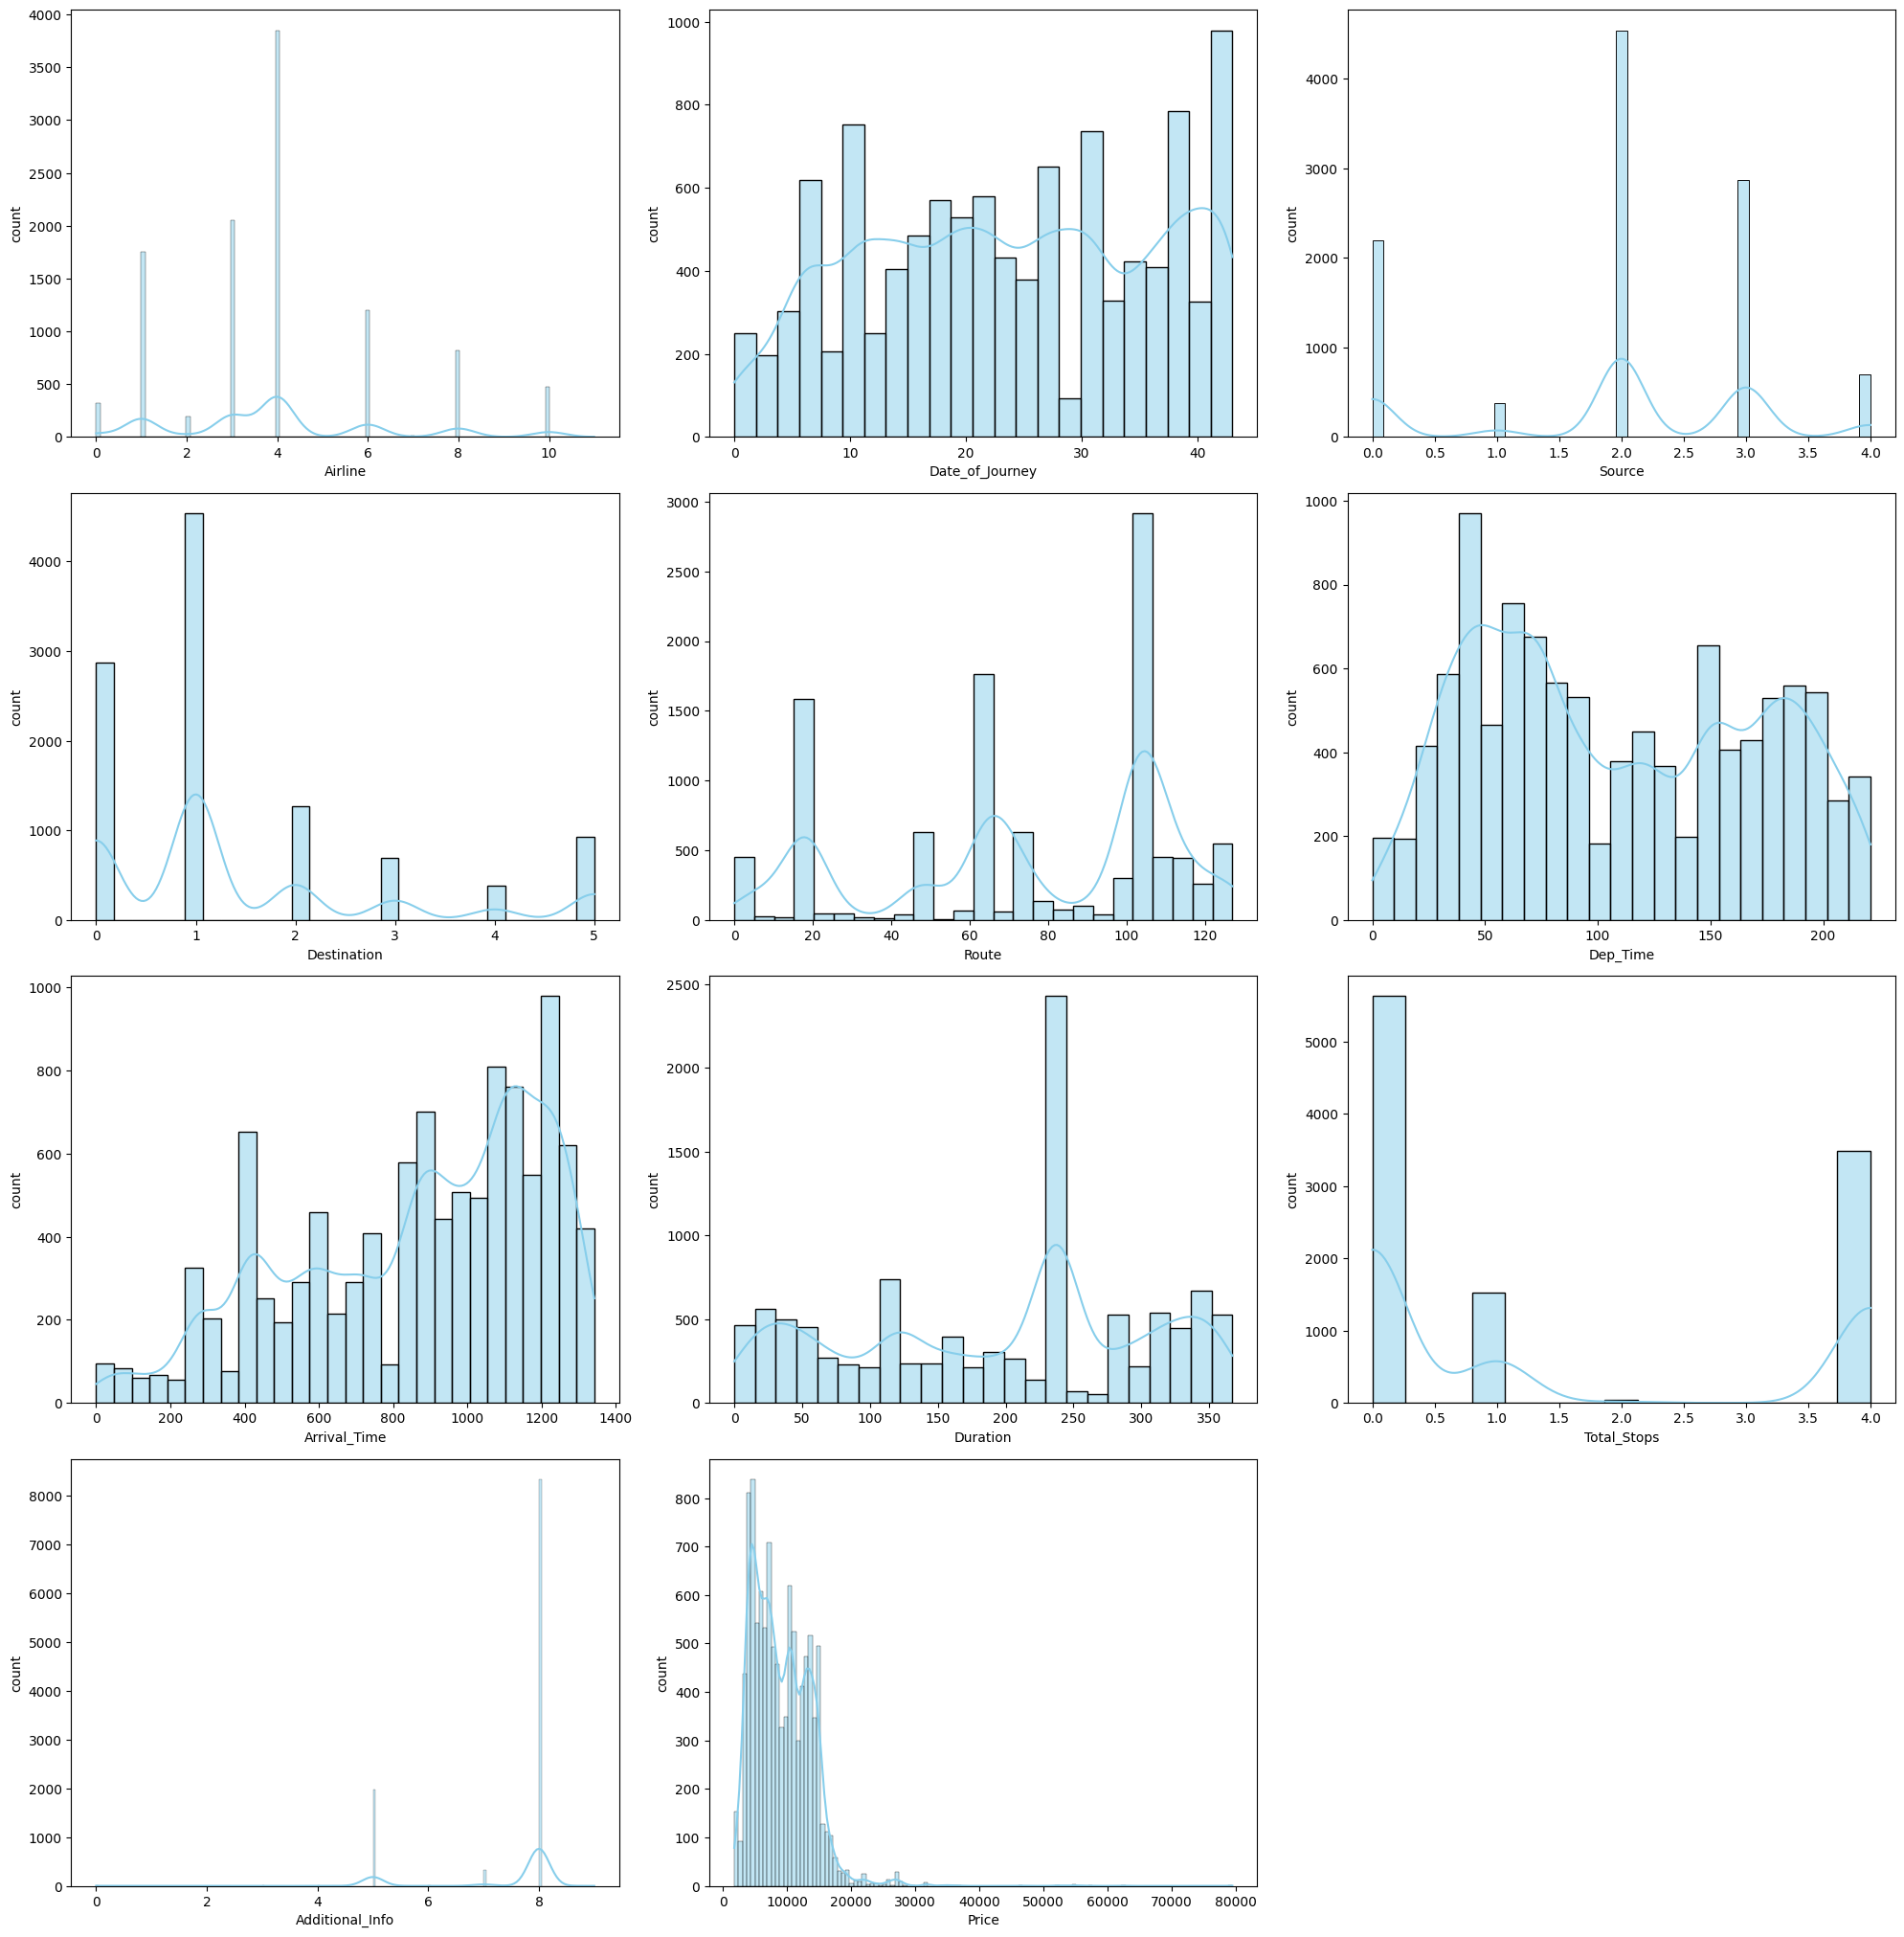

In [68]:
# AllModels=[]
if ModelType == "Regression":
    from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error
    
    # Extract best model info
    best_index = BestModelDF.index[0]    # "2 - Random forest"
    split_info = best_index.split(" - ") # ["2", "Random forest"]
    dataset_id, model_name = split_info[0], split_info[1]
    
    # Choose suffix
    if dataset_id == "1":
        sufix = ""
        Predit="Predit001"
        x_train,x_test,y_train,y_test=ORGxTrain,ORGxTest,ORGyTrain,ORGyTest
    elif dataset_id == "2":
        sufix = "RawData"
        Predit="Predit002"
        x_train,x_test,y_train,y_test=xTrainLog,xTestLog,yTrainLog,yTestLog
    elif dataset_id == "3":
        sufix = "NOC"
        Predit="Predit003"
        x_train,x_test,y_train,y_test=xTrainPCAnoc,xTestPCAnoc,yTrainPCAnoc,yTestPCAnoc
    elif dataset_id == "4":
        sufix = "Variance"
        Predit="Predit004"
        x_train,x_test,y_train,y_test= xTrainPCA,xTestPCA,yTrainPCA,yTestPCA
 
    model_map = {
        "Linear Regression": eval("linReg" + sufix),
        "Decision tree": eval("DecReg" + sufix),
        "Random forest": eval("RandomReg" + sufix),
        "Ada Boosting": eval("AdaBoostReg" + sufix),
        "Cat Boosting": eval("CatBoostReg" + sufix),
        "Gradient Boosting": eval("GradBoostReg" + sufix),
        "XG Boosting": eval("XGBReg" + sufix)
    }


    
    
    Best_Model = model_map[model_name]   
    display('Best Model:')
    display(Best_Model)

    Predit_map = {
        "Logistic Regression": Predictions[f"linReg{Predit}"],
        "Decision tree": Predictions[f"DecReg{Predit}"],
        "Random forest": Predictions[f"RandomReg{Predit}"],
        "Ada Boosting": Predictions[f"AdaBoostReg{Predit}"],
        "Cat Boosting": Predictions[f"CatBoostReg{Predit}"],
        "Gradient Boosting": Predictions[f"GradBoostReg{Predit}"],
        "XG Boosting": Predictions[f"XGBReg{Predit}"]
    }
    print("RESULT : \n\nThis Model Performs:\n")
    for i,v in RESULT.items():
        print(i,v)

    print("\n\nRegression Metrics:\n")
    print(f"R2 Score: {round(r2_score(y_test,Predit_map[model_name]),3)}\nAbsolute Mean Error: {round(mean_absolute_error(y_test,Predit_map[model_name]),3)}\nMean Square Error: {round(mean_squared_error(y_test,Predit_map[model_name]),3)}\nMedian Absolute Error: {round(median_absolute_error(y_test,Predit_map[model_name]),3)}")



if ModelType == "Classification":
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,cohen_kappa_score
    
    # Extract best model info
    best_index = BestModelDF.index[0]   # "2 - Logistic Regression"
    split_info = best_index.split(" - ")  # ["2", "Logistic Regression"]
    dataset_id, model_name = split_info[0], split_info[1]
    
    # Choose suffix and model set
    if dataset_id == "1":
        sufix = ""
        Predit="Predit001"
        x_train,x_test,y_train,y_test=ORGxTrain,ORGxTest,ORGyTrain,ORGyTest
    elif dataset_id == "2":
        sufix = "RawData"
        Predit="Predit002"
        x_train,x_test,y_train,y_test=xTrainLog,xTestLog,yTrainLog,yTestLog
    elif dataset_id == "3":
        sufix = "NOC"
        Predit="Predit003"
        x_train,x_test,y_train,y_test=xTrainPCAnoc,xTestPCAnoc,yTrainPCAnoc,yTestPCAnoc
    elif dataset_id == "4":
        sufix = "Variance"
        Predit="Predit004"
        x_train,x_test,y_train,y_test= xTrainPCA,xTestPCA,yTrainPCA,yTestPCA
    
    model_map = {
        "Logistic Regression": eval("logReg" + sufix),
        "Decision tree": eval("DecCla" + sufix),
        "Random forest": eval("RandomCla" + sufix),
        "Ada Boosting": eval("AdaBoostCla" + sufix),
        "Cat Boosting": eval("CatBoostCla" + sufix),
        "Gradient Boosting": eval("GradBoostCla" + sufix),
        "XG Boosting": eval("XGBCla" + sufix)
    }
    
    Best_Model = model_map[model_name] 
    display('Best Model:')
    display(Best_Model)


    Predit_map = {
        "Logistic Regression": Predictions[f"logReg{Predit}"],
        "Decision tree": Predictions[f"DecCla{Predit}"],
        "Random forest": Predictions[f"RandomCla{Predit}"],
        "Ada Boosting": Predictions[f"AdaBoostCla{Predit}"],
        "Cat Boosting": Predictions[f"CatBoostCla{Predit}"],
        "Gradient Boosting": Predictions[f"GradBoostCla{Predit}"],
        "XG Boosting": Predictions[f"XGBCla{Predit}"]
    }
    # print(Predit_map[model_name])
    # print(f"Accuracy Score: {accuracy_score(yTest, Predit_map[model_name])}")
    print("RESULT : \n\nThis Model Performs:\n")
    for i,v in RESULT.items():
        print(i,v)
    
    print("\n\nClassification Metrics:\n")

    print(f"Accuracy Score: {round(accuracy_score(y_test,Predit_map[model_name]),3)}\nPrecision Score: {round(precision_score(y_test,Predit_map[model_name]),3)}\nRecall Score: {round(recall_score(y_test,Predit_map[model_name]),3)}\nF1 Score: {round(f1_score(y_test,Predit_map[model_name]),3)}\nROC AUC Score: {round(roc_auc_score(y_test,Predit_map[model_name]),3)}\nKappa Score: {round(cohen_kappa_score(y_test,Predit_map[model_name]),3)}")


a=len(df.columns)/2
a=int(a+1)
plt.figure(figsize=(20,a*5))
for i,col in enumerate(df,1):
    plt.subplot(a,3,i)
    sns.histplot(data=df,x=col,kde=True,color="skyblue")
    # plt.hist(df[col], color=plt.cm.viridis(np.linspace(0,1,30)))
    plt.xlabel(col)
    plt.ylabel('count')
plt.tight_layout()  # adjust spacing
plt.show()
